# Aplicando Python para análisis de precios: descarga, manejo y análisis de datos

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Python.svg" width="300px" height="100px" />

> En esta y en las siguientes dos clases veremos un caso de aplicación de simulación montecarlo en la toma de decisiones. Para lograr este objetivo, primero veremos (en esta clase) como manipular datos con *pandas*, tanto desde un archivo local de excel como remotamente desde Yahoo Finance.

> Python Data Analysis Library: pandas es una librería de código abierto, fácil de usar y que provee alto rendimiento en structuras de datos y herramientas de análisis de datos para el lenguaje de programación Python.

**Referencias:**
- http://pandas.pydata.org/
- http://www.learndatasci.com/python-finance-part-yahoo-finance-api-pandas-matplotlib/
- https://www.datacamp.com/community/tutorials/python-excel-tutorial

## 0. Motivación

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/d7/Philippine-stock-market-board.jpg" width="400px" height="125px" />

Hace menos de dos décadas, los instrumentos financieros estaban en la cúspide de la popularidad. Las instituciones financieras de todo el mundo estaban negociando miles de millones de dólares de estos instrumentos a diario, y los analistas cuantitativos estaban modelándolos utilizando el cálculo estocástico y el poderoso `C++`.

Sin embargo, el avance en los últimos años ha sido impresionante y las cosas han cambiado. Por una parte, la [crisis financiera del 2008](https://es.wikipedia.org/wiki/Crisis_financiera_de_2008) fue producida por los instrumentos financieros llamados *derivados*. Por otra parte, los volúmenes transaccionales han bajado y la demanda de modelado con `C++` se ha marchitado con ellos. Además, un nuevo jugador entró en la competencia... `¡Python!`

`Python` ha estado ganando muchos seguidores en la industria financiera en los últimos años y con razón. No en vano, junto a `R` son los lenguajes de programación más utilizados en cuanto a análisis financiero.

## 1. Descarga de datos de Yahoo! Finance
Para esto utilizaremos el paquete *pandas_datareader*.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *pandas_datareader*. Por lo que será necesario instalarlo aparte:
- buscar en inicio "Anaconda prompt" y ejecutarlo como administrador;
- el siguiente comando instala el paquete en Anaconda: *conda install pandas-datareader*;
- una vez finalice la instalación correr el comando: *conda list*, y buscar que sí se haya instalado pandas-datareader

In [1]:
# Importar el modulo data del paquete pandas_datareader. La comunidad lo importa con el nombre de web
from pandas_datareader import data as web

In [2]:
# Librerías estándar para arreglos y gráficos
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

Ver la siguiente función...

In [4]:
# Función para descargar precios de cierre ajustados de varios activos a la vez:
def get_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Frecuencia de muestreo por defecto (freq='d')
    closes = web.DataReader(tickers, start=start_date, end=end_date, data_source='yahoo')['Adj Close']
    closes = closes.sort_index()
    return closes

In [3]:
# Instrumentos a descargar (Apple, Walmart, IBM, Nike)
names = ["AAPL", "WMT", "IBM", "NKE"]
# Fechas: inicios 2011 a finales de 2019
start = "2011-01-01"
end = "2019-12-31"

In [5]:
# Obtenemos los precios ajustados en el cierre
closes = get_closes(tickers=names,
                    start_date=start,
                    end_date=end)

In [7]:
# Observemos los primeros datos
closes.head()

Symbols,AAPL,WMT,IBM,NKE
Date,,,,
2011-01-03,10.121364,42.486691,103.839554,18.973982
2011-01-04,10.174186,42.650211,103.952209,18.506742
2011-01-05,10.257413,42.369881,103.536774,18.627964
2011-01-06,10.249121,42.019444,104.670395,18.460466
2011-01-07,10.322517,42.112896,104.156418,18.409769


In [8]:
# Observemos los últimos datos
closes.tail()

Symbols,AAPL,WMT,IBM,NKE
Date,,,,
2019-12-24,70.234581,116.601074,125.164146,98.794083
2019-12-26,71.628067,116.610832,125.099251,99.356407
2019-12-27,71.600876,116.679131,125.433052,100.204857
2019-12-30,72.025833,116.493752,123.151955,99.445206
2019-12-31,72.552094,115.947388,124.292496,99.948349


In [9]:
type(closes)

pandas.core.frame.DataFrame

¿Cómo lucen estos datos?

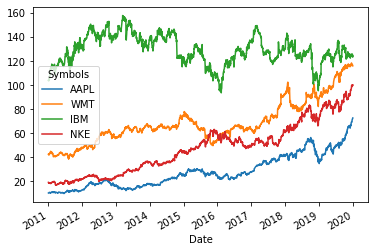

In [10]:
# Graficar
closes.plot()

Una vez tenemos los datos, podemos operar con ellos. Por ejemplo un resumen de datos estadísticos se podría obtener con

In [11]:
# Método describe
closes.describe()

Symbols,AAPL,WMT,IBM,NKE
count,2264.000000,2264.000000,2264.000000,2264.000000
mean,27.683974,68.468229,129.231899,47.021434
std,13.644428,18.178750,11.988357,21.178085
min,9.683733,38.489441,93.460327,16.687525
25%,16.772309,58.498715,121.884653,27.134572
50%,24.896622,64.446381,128.639221,48.469658
75%,37.531071,76.221758,138.668064,59.460803
max,72.552094,118.327995,157.775299,100.204857


## 2. Rendimientos diarios

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual
$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$
para $t=1,\ldots,n$.

Para el ejemplo en curso, ¿cómo calcular esto?

In [15]:
# Método pct_change
ret = closes.pct_change().dropna()

In [16]:
ret.head()

Symbols,AAPL,WMT,IBM,NKE
Date,,,,
2011-01-04,0.005219,0.003849,0.001085,-0.024625
2011-01-05,0.008180,-0.006573,-0.003996,0.006550
2011-01-06,-0.000808,-0.008271,0.010949,-0.008992
2011-01-07,0.007161,0.002224,-0.004910,-0.002746
2011-01-10,0.018833,-0.006472,-0.001961,0.007662


In [17]:
ret.tail()

Symbols,AAPL,WMT,IBM,NKE
Date,,,,
2019-12-24,0.000951,0.004033,-0.004205,0.001000
2019-12-26,0.019840,0.000084,-0.000518,0.005692
2019-12-27,-0.000380,0.000586,0.002668,0.008539
2019-12-30,0.005935,-0.001589,-0.018186,-0.007581
2019-12-31,0.007307,-0.004690,0.009261,0.005060


y la gráfica de los rendimientos se puede obtener como...

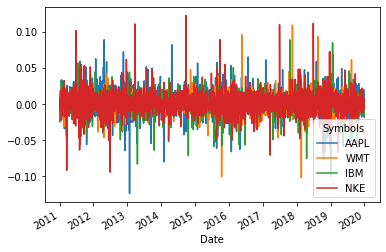

In [18]:
# Gráfica
ret.plot()

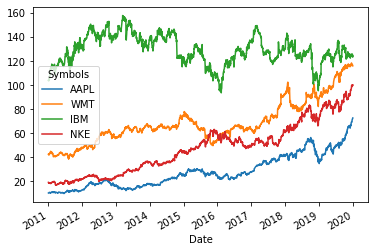

In [19]:
closes.plot()

Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Otro rendimiento usado con frecuencia es el rendimiento continuamente compuesto o rendimiento logaritmico. Éste, está definido como

$$
r_t=\ln\left(\frac{S_t}{S_{t-1}}\right).
$$

Es fácil darse cuenta que $r_t=\ln(1+R_t)$.

**Nota:** ver gráficamente que si $0\leq|x|\ll 1$, entonces $\ln(1+x)\approx x$.

Para este caso, la fórmula del rendimiento continuamente compuesto se translada facilmente a código Python (obtener, graficar y comparar).

In [22]:
ret_log = np.log(closes / closes.shift()).dropna()

In [23]:
# Rendimiento logarítmico
ret_log.head()

Symbols,AAPL,WMT,IBM,NKE
Date,,,,
2011-01-04,0.005205,0.003841,0.001084,-0.024934
2011-01-05,0.008147,-0.006594,-0.004004,0.006529
2011-01-06,-0.000809,-0.008305,0.010889,-0.009032
2011-01-07,0.007136,0.002222,-0.004923,-0.002750
2011-01-10,0.018658,-0.006493,-0.001963,0.007633


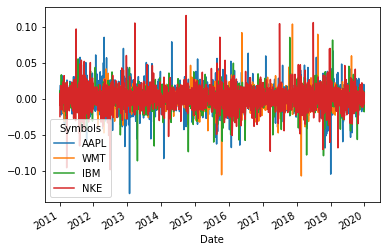

In [26]:
# Gráfica
ret_log.plot()

In [27]:
# Valor absoluto de la diferencia
np.abs(ret - ret_log)

Symbols,AAPL,WMT,IBM,NKE
Date,,,,
2011-01-04,1.357112e-05,7.387504e-06,5.880798e-07,3.082733e-04
2011-01-05,3.327671e-05,2.169587e-05,8.006992e-06,2.135887e-05
2011-01-06,3.269398e-07,3.439369e-05,5.950603e-05,4.066959e-05
2011-01-07,2.552010e-05,2.469491e-06,1.209579e-05,3.777903e-06
2011-01-10,1.751431e-04,2.103327e-05,1.924479e-06,2.920421e-05
...,...,...,...,...
2019-12-24,4.514606e-07,8.109074e-06,8.866514e-06,4.993422e-07
2019-12-26,1.942566e-04,3.501563e-09,1.344594e-07,1.613757e-05
2019-12-27,7.207240e-08,1.714522e-07,3.553570e-06,3.625491e-05


Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Podemos incluso plantear la hipótesis de que los log rendimientos son normales...

In [28]:
ret.describe()

Symbols,AAPL,WMT,IBM,NKE
count,2263.000000,2263.000000,2263.000000,2263.000000
mean,0.001001,0.000505,0.000157,0.000846
std,0.016146,0.011076,0.012456,0.015010
min,-0.123558,-0.101832,-0.082790,-0.094024
25%,-0.006865,-0.004922,-0.005753,-0.006734
50%,0.000888,0.000687,0.000305,0.000665
75%,0.009678,0.006102,0.006525,0.008519
max,0.088742,0.108984,0.088645,0.122257


In [29]:
# Media y volatilidad de rendimientos
ret["AAPL"].mean(), ret["AAPL"].std()

(0.0010013619626419092, 0.016146273622642714)

In [30]:
ret.mean(), ret.std()

(Symbols
 AAPL    0.001001
 WMT     0.000505
 IBM     0.000157
 NKE     0.000846
 dtype: float64,
 Symbols
 AAPL    0.016146
 WMT     0.011076
 IBM     0.012456
 NKE     0.015010
 dtype: float64)

___
Recapitulando, hoy aprendimos a obtener datos con pandas-datareader directamente desde fuentes remotas.

Por otra parte, estudiamos los rendimientos diarios y dimos con la conclusión de que se podrían modelar como un proceso estocástico estacionario normal.

La siguiente clase veremos como simular escenarios de comportamiento de los precios futuros (no determinístico, no sabemos como se comporta, muchas posibilidades: montecarlo) a partir de datos de ingresos diarios.

Luego, con esas predicciones veremos la probabilidad de que el precio de las acciones quede por encima (debajo) de cierto umbral y con ello tomar decisiones de vender (comprar) estas acciones.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>